<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

In [2]:
# Put the command (or commands) here that would give an answer to the above question.
import seaborn as sns
ax = sns.boxplot(y=credit_train["Class"], x=credit_train["Age"])

# Comment whether age is a good predictor
# Age appears to be a good predictor as the IQR for Good i.e. credit worthy bank customers spans an older group of customers

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [3]:
# Command:
import statsmodels.api as sm
from scipy.stats import chi2_contingency

tab = pd.crosstab(credit_train['CreditHistory.Critical'], credit_train.Class, dropna=False)
print(tab)

table = sm.stats.Table(tab)
print(table)

rslt = table.test_nominal_association()
print(rslt.statistic)
print(rslt.pvalue)

# One sentence summary:
# Based on the table (and supported by a Chi-square test) a person with critical credit history appears 
# to be more likely to be credit worthy

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Class                   Bad  Good
CreditHistory.Critical           
0                       208   373
1                        38   189
28.002666767356164
1.2114838277010875e-07


<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [4]:
import numpy as np
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

y = np.ravel(lb.fit_transform(credit_train["Class"]))
y_test = np.ravel(lb.fit_transform(credit_test["Class"]))

<h3>Q.4. Generate a logistic regression model that uses the data. Provide a summary of the model. </h3>

In [5]:
import statsmodels.api as sm

X = credit_train.iloc[:,1:]
X = sm.add_constant(X)
logit_model=sm.Logit(y,X)
result=logit_model.fit()

print(result.summary2())
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.493196
         Iterations 6
                                Results: Logit
Model:                   Logit                 No. Iterations:        6.0000  
Dependent Variable:      y                     Pseudo R-squared:      0.198   
Date:                    2019-05-31 16:51      AIC:                   831.0045
No. Observations:        808                   BIC:                   910.8120
Df Model:                16                    Log-Likelihood:        -398.50 
Df Residuals:            791                   LL-Null:               -496.59 
Converged:               1.0000                Scale:                 1.0000  
------------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------------
const                           3.2981   0.9970  3.3080 0.000

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

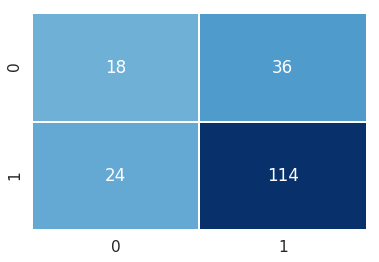

In [6]:
X_test = sm.add_constant(credit_test.iloc[:,1:])

y_score = result.predict(X_test)
y_pred = y_score.apply(lambda x: 1 if x >.5 else 0)

from sklearn.metrics import confusion_matrix
import seaborn as sn
 
cm = confusion_matrix(y_test, y_pred)

sn.set(font_scale=1.4)
sn.heatmap(cm, cbar=False, annot=True, center=20, linewidths=1, linecolor='white', cmap='Blues', fmt='g')

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [7]:
# Command that outputs acccuracy
from sklearn.metrics import accuracy_score

print('Accuracy of logistic regression classifier on test set: {:.2f}'.
      format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))

Accuracy of logistic regression classifier on test set: 0.69


<h3>Q.7. Generate the ROC curve.</h3>

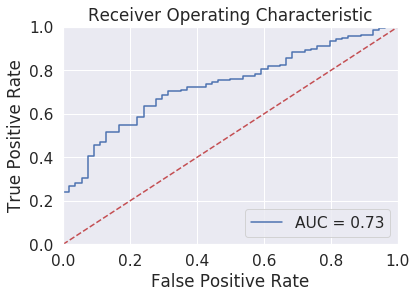

In [8]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_score, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [9]:
# Command(s):
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7336285560923241


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(solver='svd', n_components=2,) 

lda_pred = lda.fit(X, y).predict(X_test)

print(lda.priors_)
print(lda.coef_)
print(lda_pred)

[0.30445545 0.69554455]
[[ 0.00000000e+00 -2.80002182e-02 -7.18436238e-05 -2.32694688e-01
   6.45689649e-02  1.04438117e-02 -9.82364319e-02  2.44163723e-02
  -3.80769892e-01 -9.40838657e-01 -2.19123543e+00 -1.28467976e+00
  -8.25412959e-01  4.33651413e-01  1.52804329e+00  1.56983428e+00
   2.16086442e+00]]
[0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 0 1 0]


/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [15]:
confusion_matrix(y_test,lda_pred)

array([[ 18,  36],
       [ 24, 114]])

In [16]:
print(metrics.classification_report(y_test, lda_pred, digits=2))

              precision    recall  f1-score   support

           0       0.43      0.33      0.38        54
           1       0.76      0.83      0.79       138

   micro avg       0.69      0.69      0.69       192
   macro avg       0.59      0.58      0.58       192
weighted avg       0.67      0.69      0.67       192



<h3>Q.10. What is the accuracy of the new model?</h3>

In [17]:
print('Accuracy of LDA classifier on test set: {:.2f}'.
      format(accuracy_score(y_test, lda_pred, normalize=True, sample_weight=None)))

Accuracy of LDA classifier on test set: 0.69
